In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [53]:
rawDfCPU = pd.read_csv('sar_mpgu_izh.csv', skiprows=2, sep='\s+', skipinitialspace=True, nrows=4879, engine='python')
rawDfCPU.tail()

,09:20:06,CPU,%usr,%nice,%sys,%iowait,%steal,%irq,%soft,%guest,%idle
4872,12:35:06,19,1.15,0.00,0.70,0.00,0.00,0.00,0.00,0.00,98.15
4873,12:35:06,20,1.35,0.00,1.12,0.00,0.00,0.00,0.00,0.00,97.53
4874,12:35:06,21,0.47,0.00,2.30,0.00,0.00,0.00,0.00,0.00,97.23
4875,12:35:06,22,0.03,0.00,0.13,0.00,0.00,0.00,0.00,0.00,99.83
4876,12:35:06,23,0.33,0.00,0.42,0.00,0.00,0.00,0.00,0.00,99.25


In [55]:
test = rawDfCPU.iloc[:,0]
test = pd.to_datetime(test).apply(lambda t: t.strftime('%H:%M'))
yVal = rawDfCPU.iloc[:, rawDfCPU.columns.get_loc('%idle')].replace('%idle', np.nan).astype(float)
print(yVal)

0       89.86
1       80.18
2       12.63
3       92.31
4       90.84
        ...  
4872    98.15
4873    97.53
4874    97.23
4875    99.83
4876    99.25
Name: %idle, Length: 4877, dtype: float64


In [56]:
dfCPU = pd.DataFrame({'Time':test, 'CPU':rawDfCPU.iloc[:,rawDfCPU.columns.get_loc('CPU')], 'dif': 100-yVal})
dfCPU = dfCPU[dfCPU['CPU']=='all']
# dfCPU.head()
dfCPU.reset_index(inplace=True, drop=True)
dfCPU.tail()

,Time,CPU,dif
190,12:31,all,11.48
191,12:32,all,11.43
192,12:33,all,11.35
193,12:34,all,11.28
194,12:35,all,11.78


In [57]:
rawDfQ = pd.read_csv('sar_mpgu_izh.csv', skiprows=56866, sep='\s+', skipinitialspace=True, nrows=195, engine='python')
rawDfQ.tail()

,09:20:06,runq-sz,plist-sz,ldavg-1,ldavg-5,ldavg-15
190,12:31:06,2,1445,2.39,2.32,2.28
191,12:32:06,2,1442,2.35,2.32,2.28
192,12:33:06,2,1442,2.21,2.29,2.27
193,12:34:06,3,1442,2.12,2.25,2.25
194,12:35:06,3,1442,2.14,2.23,2.25


In [58]:
test = dfQ.Time
test = pd.to_datetime(test).apply(lambda t: t.strftime('%H:%M'))
print(test)

0      09:21
1      09:22
2      09:23
3      09:24
4      09:25
       ...  
190    12:31
191    12:32
192    12:33
193    12:34
194    12:35
Name: Time, Length: 195, dtype: object


In [59]:
dfQ = pd.DataFrame({'Time': test, 'runq-sz': rawDfQ.iloc[:,1]})
dfQ.head()

,Time,runq-sz
0,09:21,3
1,09:22,4
2,09:23,3
3,09:24,3
4,09:25,3


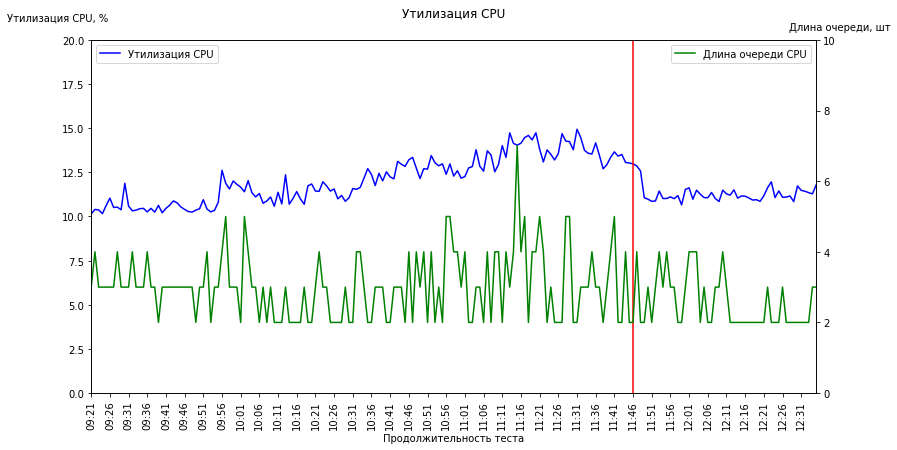

In [62]:
# График CPU
fig, ax = plt.subplots(figsize=(12.992, 6.496))
ax.plot(dfCPU.Time, dfCPU.dif, 'b',label='Утилизация CPU')
plt.axvline(x='11:46', color='r')
ax.set_xlabel('Продолжительность теста')
ax.set_ylabel('Утилизация CPU, %', rotation=0, y=1.05)
ax.set_title('Утилизация CPU', y=1.05)
ax.legend(loc=2)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylim(0,20)

# График очереди
ax2 = ax.twinx()
ax2.set_ylim(0,10)
ax2.plot(dfQ.Time, dfQ['runq-sz'], 'g', label='Длина очереди CPU')
ax2.legend(loc=1)
ax2.xaxis.label.set_visible(False)
# ax2.xaxis.set_visible(False)
ax2.set_ylabel('Длина очереди, шт', rotation=0, y=1.05)

xAxis = np.arange(0, dfCPU.index[-1],5)
plt.xlim(dfCPU['Time'][0], dfCPU['Time'][dfCPU.index[-1]])
plt.xticks(xAxis, dfCPU['Time'][xAxis], rotation='vertical')


plt.savefig('Утилизация CPU')
plt.show()
plt.close()

